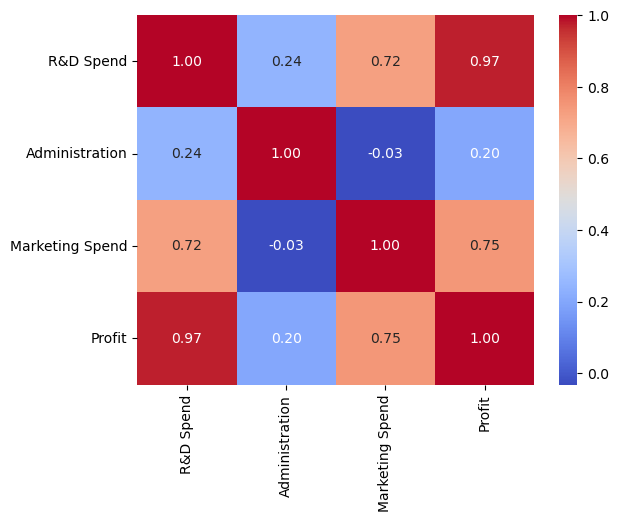

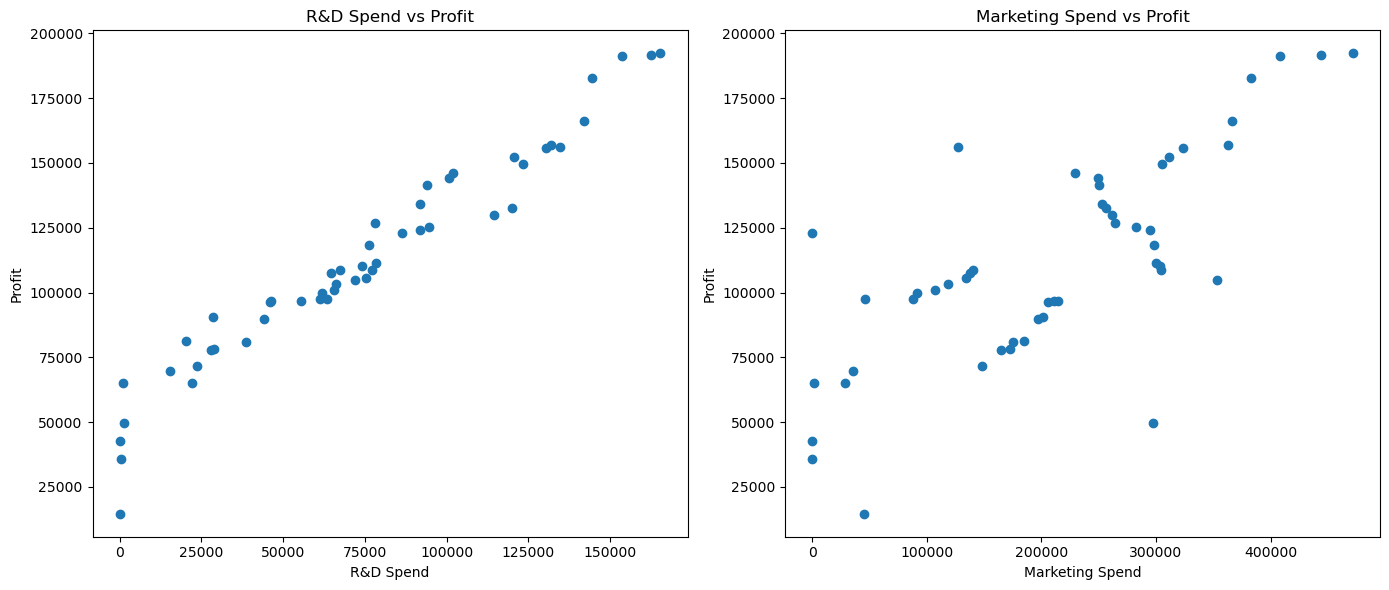

Training RMSE: 9101.19
Training R^2: 0.95
Testing RMSE: 8206.33
Testing R^2: 0.92


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Read the dataset into pandas dataframe paying attention to file delimiter
df = pd.read_csv("50_Startups.csv")

df.head()

"""
The dataset includes columns such as:
- R&D Spend: Expenditure on research and development.
- Administration: Expenditure on administrative costs.
- Marketing Spend: Expenditure on marketing.
- State: The state where the company is located.
- Profit: The target variable, representing the company's profit.
"""

# b) Identify the variables inside the dataset
df.columns

# List of variables:
"""
- 'R&D Spend': Expenditure on research and development.
- 'Administration': Expenditure on administrative costs.
- 'Marketing Spend': Expenditure on marketing.
- 'State': The state where the company is located (categorical).
- 'Profit': The target variable, representing the company's profit.
"""

# c) Investigate the correlation between the variables
df_numeric = df.select_dtypes(include=[np.number])

correlation_matrix = df_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

"""
Observations from the correlation matrix:
- 'R&D Spend' and 'Profit' have a positive correlation.
- 'Marketing Spend' and 'Profit' also show a moderate positive correlation.
- 'Administration' shows weak correlation with 'Profit'.
- 'State' is a categorical variable and is excluded from the correlation matrix.
"""

"""
d) Choose appropriate variables to predict company profit. Justify your choice.
Based on the correlation matrix and domain knowledge, 'R&D Spend' and 'Marketing Spend' appear to be strong predictors of profit.
'Administration' shows weaker correlation with profit, and 'State' is categorical, so it will require encoding before it can be used.
So I will choose 'R&D Spend' and 'Marketing Spend' as our explanatory variables to predict profit.
"""

# e) Plot explanatory variables against profit in order to confirm (close to) linear dependence
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

plt.subplot(1, 2, 2)
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

"""
From the plots, we can see a positive relationship between both 'R&D Spend' and 'Marketing Spend' with 'Profit', suggesting potential
linear dependencies.
"""

# f) Form training and testing data (80/20 split)
X = df[['R&D Spend', 'Marketing Spend']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Train linear regression model with training data
model = LinearRegression()
model.fit(X_train, y_train)

# h) Compute RMSE and R^2 values for training and testing data separately
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

"""
The RMSE values provide an estimate of the average prediction error in the units of the target variable (Profit).
R^2 values indicate how well the model explains the variance in the data. A higher R^2 indicates better model performance.
"""

print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training R^2: {r2_train:.2f}")
print(f"Testing RMSE: {rmse_test:.2f}")
print(f"Testing R^2: {r2_test:.2f}")
